## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy* 

**1.** Import pandas under the name `pd`.

In [1]:
import pandas as pd

## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [3]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index = labels)
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


**5.** Display a summary of the basic information about this DataFrame and its data.

In [99]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**6.** Return the first 3 rows of the DataFrame `df`.

In [100]:
df.head(3)

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [101]:
df[["animal", "age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


## **8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [102]:
df.iloc[[3, 4, 8]][['animal', 'age']]
# df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 2.

In [4]:
df[df["visits"] > 2]

,age,animal,priority,visits
b,3.0,cat,yes,3
d,NaN,dog,yes,3
f,2.0,cat,no,3


**10.** Select the rows where the age is missing, i.e. is `NaN`.

In [104]:
df[df["age"].isnull()]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [105]:
df[(df["age"] < 3) & (df["animal"] == "cat")]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


## **12.** Select the rows the age is between 2 and 4 (inclusive).

In [106]:
df[df["age"].between(2, 4)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


**13.** Change the age in row 'f' to 1.5.

In [107]:
df.loc["f", "age"] = 1.5

**14.** Calculate the sum of all visits (the total number of visits).

In [108]:
df["visits"].sum()

19

**15.** Calculate the mean age for each different animal in `df`.

In [5]:
df.groupby('animal')['age'].mean()

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

## **16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [10]:
df.loc["k"] = [5.5, 'dog', 'no', 2]
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


In [11]:
df.drop("k")

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


## **17.** Count the number of each type of animal in `df`.

In [12]:
df.animal.value_counts()

dog      5
cat      4
snake    2
Name: animal, dtype: int64

## **18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order.

In [113]:
df.sort_values(by = ["age", "visits"], ascending = [False, True])

,age,animal,priority,visits
i,7.0,dog,no,2
e,5.0,dog,no,2
g,4.5,snake,no,1
j,3.0,dog,no,1
b,3.0,cat,yes,3
a,2.5,cat,yes,1
f,1.5,cat,no,3
c,0.5,snake,no,2
h,NaN,cat,yes,1
d,NaN,dog,yes,3


## **19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [16]:
df = pd.DataFrame(data, index = labels)
df.priority = df.priority.map({'yes': True, 'no': False})
df

,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,snake,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,2.0,cat,False,3
g,4.5,snake,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


## **20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [115]:
df['animal'] = df['animal'].replace('snake', 'python')
df

,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,python,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,1.5,cat,False,3
g,4.5,python,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages.

In [20]:
pd.pivot_table(df, values='age', index='animal', columns='visits', aggfunc=np.mean)

visits,1,2,3
animal,,,
cat,2.5,NaN,2.5
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

## **22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

In [23]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df.shift()

,A
0,NaN
1,1.0
2,2.0
3,2.0
4,3.0
5,4.0
6,5.0
7,5.0
8,5.0
9,6.0


## **23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [27]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df, df.mean(axis=1))
df.sub(df.mean(axis=1), axis=0)

          0         1         2
0  0.867654  0.111649  0.875671
1  0.373059  0.212030  0.706308
2  0.596219  0.651353  0.852617
3  0.706222  0.764220  0.298692
4  0.363360  0.016311  0.594075 0    0.618325
1    0.430466
2    0.700063
3    0.589711
4    0.324582
dtype: float64


,0,1,2
0,0.249329,-0.506675,0.257346
1,-0.057406,-0.218435,0.275842
2,-0.103844,-0.048710,0.152554
3,0.116511,0.174509,-0.291019
4,0.038778,-0.308271,0.269493


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? (Find that column's label.)

In [28]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0.027738,0.257286,0.494332,0.896237,0.087791,0.659957,0.358921,0.972231,0.650966,0.441262
1,0.889916,0.053097,0.779597,0.333355,0.142119,0.075882,0.803350,0.269739,0.088951,0.317630
2,0.108085,0.283518,0.565736,0.669126,0.770841,0.779861,0.636175,0.175557,0.777941,0.307045
3,0.606041,0.953902,0.529126,0.178860,0.585940,0.089925,0.319669,0.346217,0.486775,0.019478
4,0.708136,0.981075,0.016930,0.220969,0.722331,0.428901,0.282159,0.137427,0.877403,0.297630


In [30]:
df.sum(axis=0).argmin()

'j'

In [31]:
df.sum().idxmin()

'j'

## **25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

In [54]:
df = pd.DataFrame(np.random.randint(0,2,(10, 4)))
df

,0,1,2,3
0,1,1,0,0
1,0,1,1,0
2,0,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,1
6,0,0,1,0
7,1,0,1,1
8,1,0,1,0
9,1,0,1,0


In [55]:
df.drop_duplicates(keep=False) # count `len`

,0,1,2,3
0,1,1,0,0
1,0,1,1,0
2,0,0,0,0
5,1,0,0,1
6,0,0,1,0
7,1,0,1,1


## **26.** You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the *column* which contains the *third* NaN value.

(You should return a Series of column labels.)

In [70]:
df = pd.DataFrame(np.concatenate([np.ones((10,5)) * 3.14, np.repeat(np.nan, 50).reshape(10,5)], axis=1))
(df.isnull().cumsum(axis=1) == 3).idxmax(axis=1)

0    7
1    7
2    7
3    7
4    7
5    7
6    7
7    7
8    7
9    7
dtype: int64

## **27.** A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example: 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.

In [71]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
df.groupby('grps').vals.nlargest(3).sum(level=0)

grps
a    409
b    156
c    345
Name: vals, dtype: int64

## **28.** A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

In [80]:
df = pd.DataFrame({'A': np.random.randint(1,101,100), 'B': np.random.random(100)})
df.groupby(pd.cut(df.A, np.arange(0, 101, 10))).B.sum()

A
(0, 10]      6.275521
(10, 20]     3.531220
(20, 30]     5.682473
(30, 40]     7.198198
(40, 50]     4.464023
(50, 60]     3.944841
(60, 70]     3.585712
(70, 80]     5.124624
(80, 90]     7.542286
(90, 100]    3.918600
Name: B, dtype: float64

## DataFrames: harder problems 

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

## **30.** Consider a DataFrame containing rows and columns of purely numerical data. Create a list of the row-column index locations of the 3 largest values.

In [91]:
df = pd.DataFrame(np.random.random((10,10)))
df.unstack().nlargest(3).index.tolist()[::-1]

7  9    0.997295
1  5    0.993950
3  0    0.990858
dtype: float64

## **31.** Given a DataFrame with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals', replace any negative values in 'vals' with the group mean.

In [101]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,-345,3,1,45,-14,4,-52,54,-23,235,-21,57,3,87]})
df[df.vals>0].groupby('grps').vals.mean()

grps
a      6.333333
b     32.000000
c    161.000000
Name: vals, dtype: float64

In [103]:
def replace(group):
    mask = group < 0
    group[mask] = group[~mask].mean()
    return group

df.vals = df.groupby('grps').vals.transform(replace)
df

,grps,vals
0,a,12.000000
1,a,6.333333
2,a,3.000000
3,b,1.000000
4,b,45.000000
5,c,161.000000
6,a,4.000000
7,a,6.333333
8,b,54.000000
9,c,161.000000


## **32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [105]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})

g1 = df.groupby('group').value
g2 = df.fillna(0).groupby('group').value

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count() 
s.reset_index(level=0, drop=True).sort_index() 

0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


## **33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [107]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B')
s = pd.Series(np.random.random(len(dti)), index=dti)
s

2015-01-01    0.453456
2015-01-02    0.146120
2015-01-05    0.833038
2015-01-06    0.296926
2015-01-07    0.005926
2015-01-08    0.023967
2015-01-09    0.123429
2015-01-12    0.612839
2015-01-13    0.158965
2015-01-14    0.052166
2015-01-15    0.423045
2015-01-16    0.992391
2015-01-19    0.530476
2015-01-20    0.206798
2015-01-21    0.014605
2015-01-22    0.008374
2015-01-23    0.065227
2015-01-26    0.210129
2015-01-27    0.791710
2015-01-28    0.470675
2015-01-29    0.351513
2015-01-30    0.299920
2015-02-02    0.502581
2015-02-03    0.170678
2015-02-04    0.790257
2015-02-05    0.504905
2015-02-06    0.418146
2015-02-09    0.570817
2015-02-10    0.200941
2015-02-11    0.854988
                ...   
2015-11-20    0.032731
2015-11-23    0.734788
2015-11-24    0.002966
2015-11-25    0.531869
2015-11-26    0.134578
2015-11-27    0.620245
2015-11-30    0.924200
2015-12-01    0.928811
2015-12-02    0.309182
2015-12-03    0.879544
2015-12-04    0.417300
2015-12-07    0.412761
2015-12-08 

## **34.** Find the sum of the values in `s` for every Wednesday.

In [111]:
s[s.index.weekday == 2].sum()

24.752370689991494

**35.** For each calendar month in `s`, find the mean of values.

In [114]:
s.groupby(s.index.month).mean()

1     0.321441
2     0.505020
3     0.411837
4     0.449698
5     0.646444
6     0.495442
7     0.531944
8     0.368877
9     0.441302
10    0.488225
11    0.523755
12    0.462913
dtype: float64

In [115]:
s.resample('M').mean()

2015-01-31    0.321441
2015-02-28    0.505020
2015-03-31    0.411837
2015-04-30    0.449698
2015-05-31    0.646444
2015-06-30    0.495442
2015-07-31    0.531944
2015-08-31    0.368877
2015-09-30    0.441302
2015-10-31    0.488225
2015-11-30    0.523755
2015-12-31    0.462913
Freq: M, dtype: float64

## **36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [119]:
s.groupby(pd.TimeGrouper('4M')).idxmax()

2015-01-31   2015-01-16
2015-05-31   2015-05-07
2015-09-30   2015-07-17
2016-01-31   2015-12-22
Freq: 4M, dtype: datetime64[ns]

## **37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [120]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
(It's some flight data I made up; it's not meant to be accurate in any way.)


In [159]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045.0,LoNDon_paris,"[23, 47]"
1,<Air France> (12),NaN,MAdrid_miLAN,[]
2,(British Airways. ),10065.0,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,NaN,Budapest_PaRis,[13]
4,"""Swiss Air""",10085.0,Brussels_londOn,"[67, 32]"


## **38.** Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [160]:
df.FlightNumber = df.FlightNumber.interpolate().astype(int)
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045,LoNDon_paris,"[23, 47]"
1,<Air France> (12),10055,MAdrid_miLAN,[]
2,(British Airways. ),10065,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,10075,Budapest_PaRis,[13]
4,"""Swiss Air""",10085,Brussels_londOn,"[67, 32]"


## **39.** The From\_To column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

In [161]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


## **40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [162]:
temp.From = temp.From.str.capitalize()
temp.To = temp.To.str.capitalize()
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


## **41.** Delete the From_To column from `df` and attach the temporary DataFrame from the previous questions.

In [163]:
df = df.drop('From_To',axis=1)
df = df.join(temp)
df

,Airline,FlightNumber,RecentDelays,From,To
0,KLM(!),10045,"[23, 47]",London,Paris
1,<Air France> (12),10055,[],Madrid,Milan
2,(British Airways. ),10065,"[24, 43, 87]",London,Stockholm
3,12. Air France,10075,[13],Budapest,Paris
4,"""Swiss Air""",10085,"[67, 32]",Brussels,London


## **42**. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [164]:
df['Airline'] = df['Airline'].str.extract('([A-z\s]+)')
df
# df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()

/Users/doris/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,Airline,FlightNumber,RecentDelays,From,To
0,KLM,10045,"[23, 47]",London,Paris
1,Air France,10055,[],Madrid,Milan
2,British Airways,10065,"[24, 43, 87]",London,Stockholm
3,Air France,10075,[13],Budapest,Paris
4,Swiss Air,10085,"[67, 32]",Brussels,London


## **43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [165]:
delays = df.RecentDelays.apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1,(len(delays.columns)+1))]
df = df.join(delays)
df = df.drop('RecentDelays', axis=1)
df

,Airline,FlightNumber,From,To,delay_1,delay_2,delay_3
0,KLM,10045,London,Paris,23.0,47.0,NaN
1,Air France,10055,Madrid,Milan,NaN,NaN,NaN
2,British Airways,10065,London,Stockholm,24.0,43.0,87.0
3,Air France,10075,Budapest,Paris,13.0,NaN,NaN
4,Swiss Air,10085,Brussels,London,67.0,32.0,NaN


The DataFrame should look much better now.

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

## **44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [168]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index=mi)
s

A  0    0.667431
   1    0.668568
   2    0.055985
   3    0.573345
   4    0.573977
   5    0.417350
   6    0.353770
   7    0.544073
   8    0.360575
   9    0.453916
B  0    0.359329
   1    0.403574
   2    0.859130
   3    0.533732
   4    0.461074
   5    0.114948
   6    0.002067
   7    0.844477
   8    0.838435
   9    0.308430
C  0    0.457460
   1    0.522376
   2    0.091954
   3    0.972931
   4    0.359427
   5    0.484232
   6    0.240853
   7    0.100489
   8    0.051955
   9    0.777589
dtype: float64

## **46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [170]:
s.loc[:,[1,3,6]]

A  1    0.668568
   3    0.573345
   6    0.353770
B  1    0.403574
   3    0.533732
   6    0.002067
C  1    0.522376
   3    0.972931
   6    0.240853
dtype: float64

## **47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [174]:
s.loc[pd.IndexSlice[:'B',5:]]

A  5    0.417350
   6    0.353770
   7    0.544073
   8    0.360575
   9    0.453916
B  5    0.114948
   6    0.002067
   7    0.844477
   8    0.838435
   9    0.308430
dtype: float64

**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [177]:
s.sum(level=0)

A    4.668990
B    4.725196
C    4.059267
dtype: float64

## **49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [178]:
s.unstack()

,0,1,2,3,4,5,6,7,8,9
A,0.667431,0.668568,0.055985,0.573345,0.573977,0.417350,0.353770,0.544073,0.360575,0.453916
B,0.359329,0.403574,0.859130,0.533732,0.461074,0.114948,0.002067,0.844477,0.838435,0.308430
C,0.457460,0.522376,0.091954,0.972931,0.359427,0.484232,0.240853,0.100489,0.051955,0.777589


In [180]:
s.unstack().sum(axis=1)

A    4.668990
B    4.725196
C    4.059267
dtype: float64

**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [181]:
s.swaplevel(0, 1)

0  A    0.667431
1  A    0.668568
2  A    0.055985
3  A    0.573345
4  A    0.573977
5  A    0.417350
6  A    0.353770
7  A    0.544073
8  A    0.360575
9  A    0.453916
0  B    0.359329
1  B    0.403574
2  B    0.859130
3  B    0.533732
4  B    0.461074
5  B    0.114948
6  B    0.002067
7  B    0.844477
8  B    0.838435
9  B    0.308430
0  C    0.457460
1  C    0.522376
2  C    0.091954
3  C    0.972931
4  C    0.359427
5  C    0.484232
6  C    0.240853
7  C    0.100489
8  C    0.051955
9  C    0.777589
dtype: float64

## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

## For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

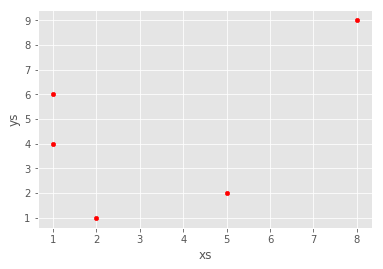

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

df.plot.scatter(x = 'xs', y = 'ys', color = 'red', marker = 'o')

## **57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

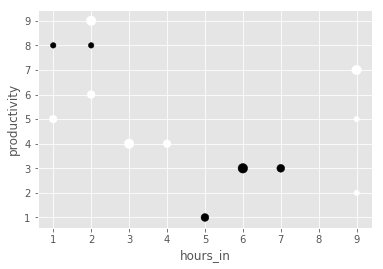

In [194]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df.plot.scatter('hours_in', 'productivity', s = df.happiness * 30, c = df.caffienated)

## **58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

(-1, 12)

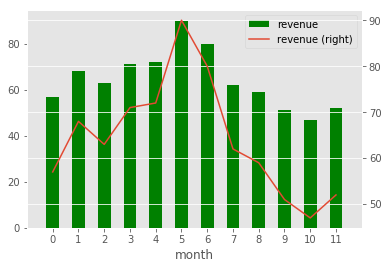

In [201]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar('month', 'revenue', color = 'green')
df.plot.line('month', 'revenue', secondary_y = True, ax = ax)
ax.set_xlim(-1, 12)